In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")


In [3]:
from google.colab import files
uploaded = files.upload()



Saving train.csv to train.csv


In [18]:
import pandas as pd

# Read the uploaded file (adjust filename if different)
df = pd.read_csv('train.csv')

# Preview the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Show total missing values in each column
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
# Make a copy to avoid pandas warning
df = df.copy()

# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column
df.drop(columns='Cabin', inplace=True)


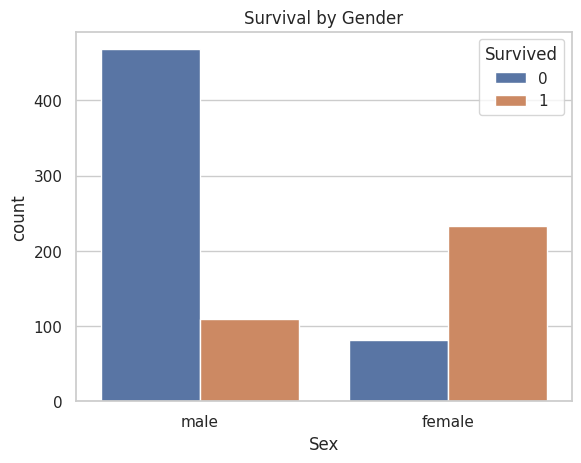

In [21]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


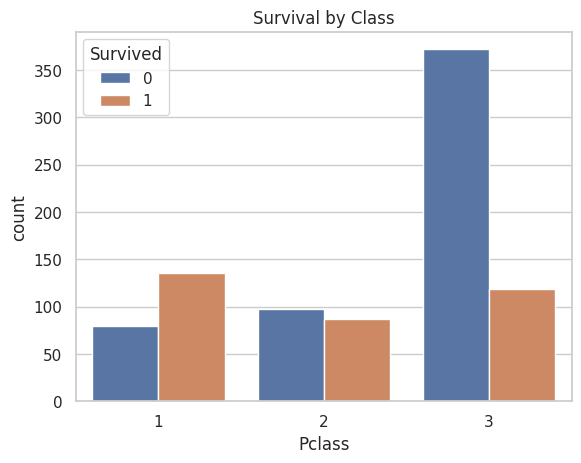

In [22]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()


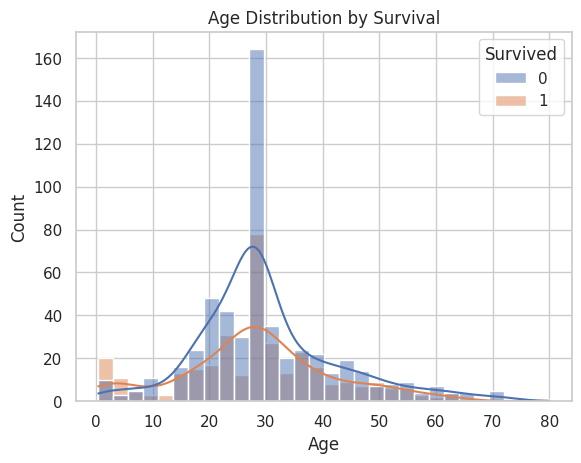

In [23]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


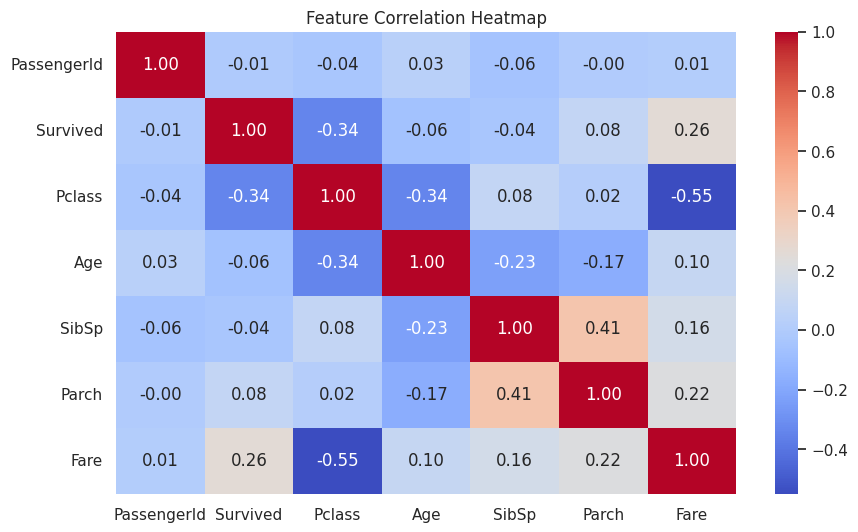

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
